In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("..\Dataset\car-mpg.csv")

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\SHOYEB ANSARI\AppData\Local\Temp\ipykernel_21548\1408195271.py:1: SyntaxWarning: invalid escape sequence '\D'
  df = pd.read_csv("..\Dataset\car-mpg.csv")


In [3]:
df.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,0,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,0,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,0,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,0,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,0,ford torino


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   mpg       398 non-null    float64
 1   cyl       398 non-null    int64  
 2   disp      398 non-null    float64
 3   hp        398 non-null    object 
 4   wt        398 non-null    int64  
 5   acc       398 non-null    float64
 6   yr        398 non-null    int64  
 7   origin    398 non-null    int64  
 8   car_type  398 non-null    int64  
 9   car_name  398 non-null    object 
dtypes: float64(3), int64(5), object(2)
memory usage: 31.2+ KB


In [5]:
df["hp"].unique()  # there is ? mark, let's replace ? mark with null
    

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [6]:
df["hp"].replace('?', 0, inplace=True)

C:\Users\SHOYEB ANSARI\AppData\Local\Temp\ipykernel_21548\103352848.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["hp"].replace('?', 0, inplace=True)


In [7]:
df["hp"].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', 0, '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [8]:
df["hp"] = df["hp"].astype("int64")

In [9]:
df.isnull().sum()

mpg         0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
origin      0
car_type    0
car_name    0
dtype: int64

In [10]:
# Fill null value
df["hp"] = df["hp"].fillna(df["hp"].median())

In [11]:
df.isnull().sum()

mpg         0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
origin      0
car_type    0
car_name    0
dtype: int64

In [12]:
df["car_name"].value_counts().head()

car_name
ford pinto            6
toyota corolla        5
amc matador           5
ford maverick         5
chevrolet chevette    4
Name: count, dtype: int64

In [13]:
# drop car name column
df_copy = df.copy()

In [14]:
df.drop(columns = ["car_name"], axis = 1, inplace = True)

## Bivariate analysis

In [15]:
df.columns

Index(['mpg', 'cyl', 'disp', 'hp', 'wt', 'acc', 'yr', 'origin', 'car_type'], dtype='object')

In [16]:
plt.style.use("dark_background")

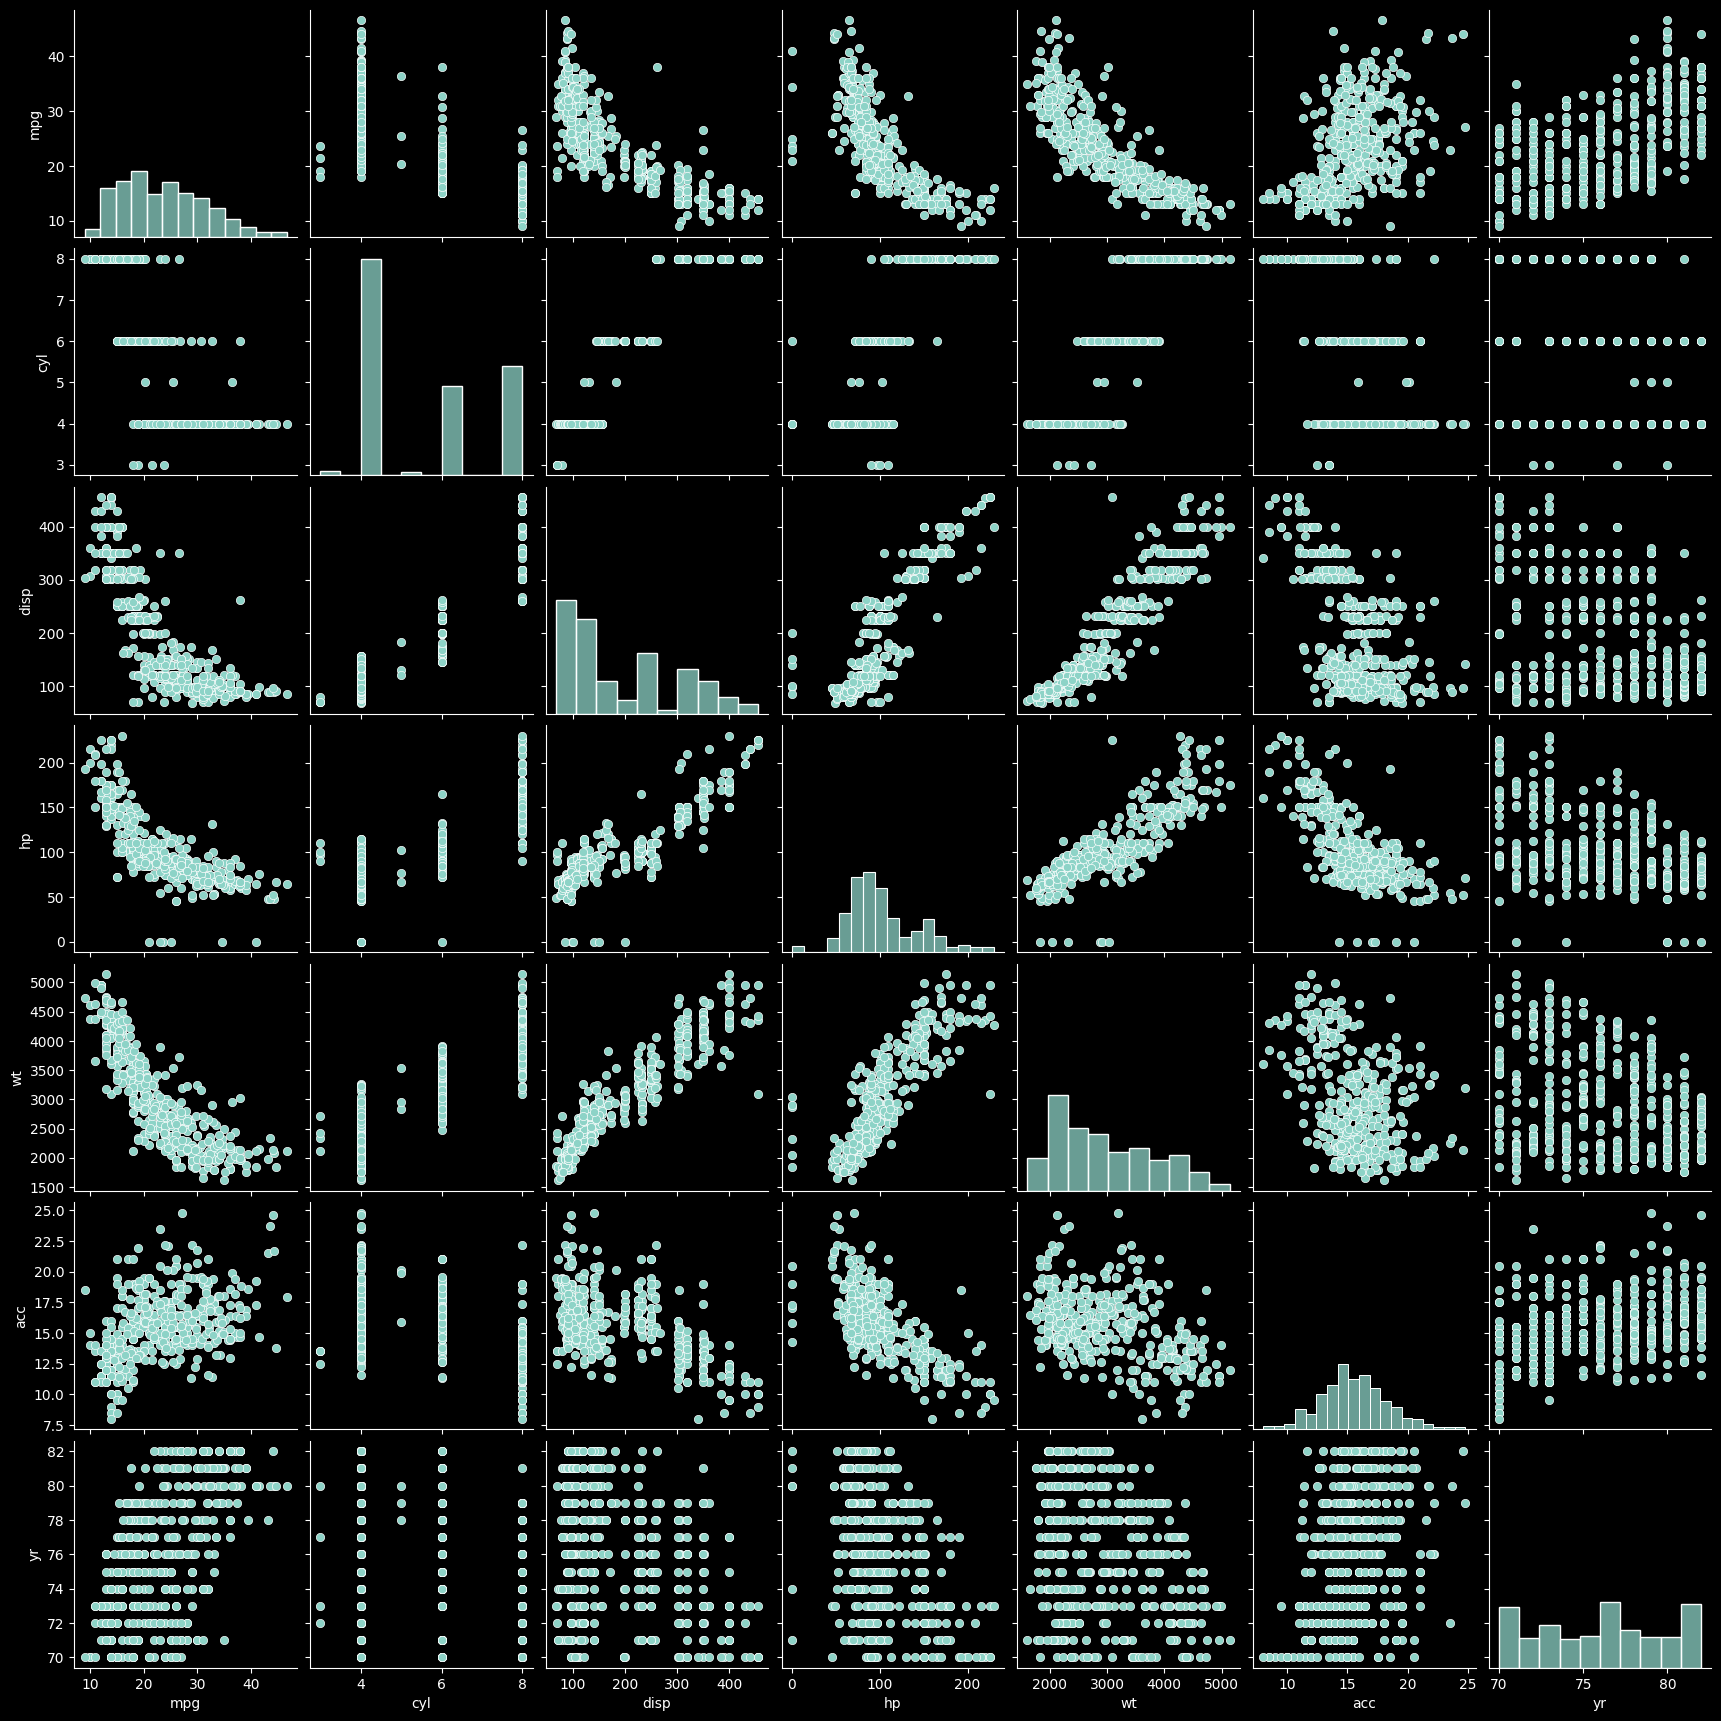

In [17]:
sns.pairplot(df, vars = ['mpg', 'cyl', 'disp', 'hp', 'wt', 'acc', 'yr'])

<Axes: >

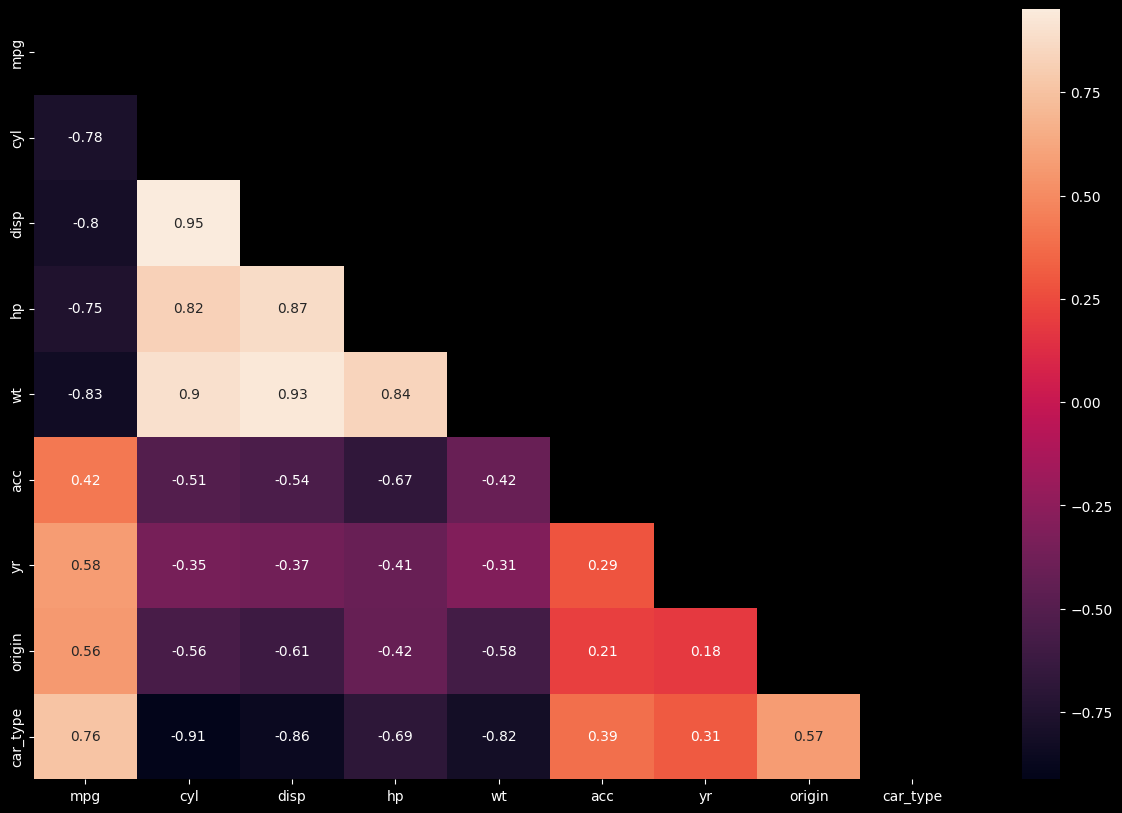

In [18]:
plt.figure(figsize = (15, 10))
corr_matrix = df.corr()
mask_ut = np.triu(np.ones_like(corr_matrix, dtype = bool))
sns.heatmap(corr_matrix, annot = True, mask = mask_ut)

In [19]:
df.origin.unique()

array([1, 3, 2], dtype=int64)

# Linear regression

### Creating Train and Test data

In [20]:
Y = df[["mpg"]]

In [21]:
Y

,mpg
0,18.0
1,15.0
2,18.0
3,16.0
4,17.0
...,...
393,27.0
394,44.0
395,32.0
396,28.0


In [22]:
X = df.loc[0:, "cyl" :"car_type", ]

In [23]:
from sklearn.model_selection import train_test_split 

In [24]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30, random_state = 1)

In [25]:
y_test

,mpg
174,18.0
359,28.1
250,19.4
274,20.3
283,20.2
...,...
382,34.0
39,14.0
171,24.0
271,23.2


In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
linear_regression_model = LinearRegression()

In [28]:
linear_regression_model.fit(x_train, y_train)

LinearRegression()

In [29]:
for idx, col in enumerate(x_train.columns):
    print(f"The coefficient for {col} is {linear_regression_model.coef_[0][idx]}")

The coefficient for cyl is 1.4662991813641915
The coefficient for disp is 0.01904897919498539
The coefficient for hp is -0.02485871618952635
The coefficient for wt is -0.006873293895567477
The coefficient for acc is 0.12596042384785355
The coefficient for yr is 0.7777025158337295
The coefficient for origin is 1.0158463922009586
The coefficient for car_type is 5.924959292710238


## Model evaluation 

In [30]:
# Score of train data
linear_regression_model.score(x_train, y_train) * 100

82.91274483626654

In [31]:
# Score of test data
linear_regression_model.score(x_test, y_test) * 100

86.00647281755438

### Mean square error

In [32]:
mse = np.mean((linear_regression_model.predict(x_test) - y_test) ** 2)

In [33]:
mse

8.18158737486962

In [34]:
y_predict = linear_regression_model.predict(x_test)

In [35]:
x_test

,cyl,disp,hp,wt,acc,yr,origin,car_type
174,6,171.0,97,2984,14.5,75,1,0
359,4,141.0,80,3230,20.4,81,2,1
250,8,318.0,140,3735,13.2,78,1,0
274,5,131.0,103,2830,15.9,78,2,1
283,6,232.0,90,3265,18.2,79,1,0
...,...,...,...,...,...,...,...,...
382,4,108.0,70,2245,16.9,82,3,1
39,8,400.0,175,4464,11.5,71,1,0
171,4,134.0,96,2702,13.5,75,3,1
271,4,156.0,105,2745,16.7,78,1,1


In [36]:
sample_data = {
    "cyl":      [10, 8, 12],
    "disp":     [224, 332, 102],
    "hp":       [113, 96, 531],
    "wt":       [2500, 5310, 1241],
    "acc":      [12, 15, 18],
    "yr":       [75, 88, 91],
    "origin":   [2, 1, 3],
    "car_type": [1, 0, 0] 
}

In [37]:
dummy_df = pd.DataFrame(data = sample_data)
dummy_df

,cyl,disp,hp,wt,acc,yr,origin,car_type
0,10,224,113,2500,12,75,2,1
1,8,332,96,5310,15,88,1,0
2,12,102,531,1241,18,91,3,0


In [38]:
linear_regression_model.predict(dummy_df)

array([[35.85748236],
       [19.63802437],
       [43.0185288 ]])

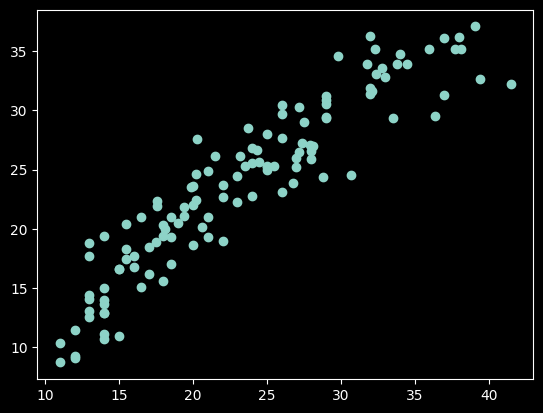

In [39]:
plt.scatter(y_test["mpg"], y_predict)

## Scaled model

In [40]:
from scipy.stats import zscore


x_train_scaled  = x_train
x_test_scaled = x_test
y_train_scaled = y_train
y_test_scaled = y_test

In [41]:
x_train_scaled = zscore(x_train_scaled)
x_test_scaled = zscore(x_test_scaled)
y_train_scaled = zscore(y_train_scaled)
y_test_scaled = zscore(y_test_scaled)

In [42]:
linear_regression_model_scaled = LinearRegression()

In [43]:
linear_regression_model_scaled.fit(x_train_scaled, y_train_scaled)

LinearRegression()

In [44]:
linear_regression_model_scaled.score(x_test_scaled, y_test_scaled) 

0.8650467185298903

In [45]:
linear_regression_model_scaled.score(x_train_scaled, y_train_scaled) 

0.8291274483626654

In [46]:
linear_regression_model_scaled.predict(dummy_df)

array([[-1770.62808973],
       [-3809.88227271],
       [ -918.77254665]])

## Ridge 
$$ \hat{y} = m_1 * x_1 + m_2 * x_2 + m_3 * x_3 + .... + m_n * x_n + c$$
Error:
$$error= \sum_{i=1}^{n}(y_i - y)^2$$

After applying ridge:
$$error= \sum_{i=1}^{n}(y_i - y)^2  + \lambda * \sum_{i=1}^{n} m_i^2 $$

In [47]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [104]:
ridge = Ridge(alpha = 1)
ridge.fit(x_train, y_train)

Ridge(alpha=1)

In [105]:
ridge.coef_

array([[ 1.27813309,  0.01953919, -0.02342131, -0.00691113,  0.12358306,
         0.77924783,  1.02314465,  5.38099576]])

In [106]:
ridge.score(x_test, y_test) - linear_regression_model.score(x_test, y_test), ridge.score(x_test, y_test) * 100

(0.0008366668246599929, 86.09013950002038)

In [89]:
# Ridge in Scaled data

ridge_scaled = Ridge(alpha = 1)
ridge_scaled.fit(x_train_scaled, y_train_scaled)

Ridge(alpha=1)

In [93]:
ridge_scaled.score(x_test_scaled, y_test_scaled) - linear_regression_model_scaled.score(x_test_scaled, y_test_scaled) , ridge_scaled.score(x_test_scaled, y_test_scaled)

(0.0010251980187163667, 0.8660719165486067)

In [97]:
ridge_scaled.score(x_train_scaled, y_train_scaled)

0.8289848697592743

## Lasso Regularisation 
$$ \hat{y} = m_1 * x_1 + m_2 * x_2 + m_3 * x_3 + .... + m_n * x_n + c$$
Error:
$$error= \sum_{i=1}^{n}(y_i - y)^2$$

After applying ridge:
$$error= \sum_{i=1}^{n}(y_i - y)^2  + \lambda * \sum_{i=1}^{n} |m_i| $$

In [ ]:
lasso = Lasso(alpha = 0.0000013241)
lasso.fit(x_train, y_train)

print(f'Lasso coefficients {(lasso.coef_)}')
print(f'Train score : {lasso.score(x_train, y_train)}')
print(f'Test score : {lasso.score(x_test, y_test)}')

Lasso coefficients [ 1.46581366  0.01905062 -0.02485547 -0.00687335  0.12594574  0.77770252
  1.01579625  5.92380521]
Train score : 0.8291274474244332
Test score : 0.8600669104461804


In [119]:
# Scaled data


lasso = Lasso(alpha = 0.000000023)
lasso.fit(x_train_scaled, y_train_scaled)

print(f'Lasso coefficients {(lasso.coef_)}')
print(f'Train score : {lasso.score(x_train_scaled, y_train_scaled)}')
print(f'Test score : {lasso.score(x_test_scaled, y_test_scaled)}')

Lasso coefficients [ 0.19232936  0.01960738 -0.07630893 -0.58601462  0.00419847  0.34809922
  0.07136189  0.25719695]
Train score : 0.8222562430180761
Test score : 0.8643532475023576


In [132]:
for x in np.arange(0.9, 0.1, -0.2):
    print(x)

0.9
0.7
0.4999999999999999
0.2999999999999998
